In [1]:
import pandas as pd
import numpy as np
import os

from alpha.model.GRU.scheduler import *
from alpha.data.underlying import *
from alpha.factor.alpha_101 import *
from alpha.config.config import *

from alpha.eval.eval import *
from alpha.eval.backtest import *
from alpha.eval.attention_plot import *


/home/chencheng/pytorch/lib/python3.7/site-packages/pandas/compat/__init__.py:124: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)
/home/chencheng/pytorch/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Data
All data must be BOD. 

    --- Ashare_data --- 1day_data   --- pv.h5

                    --- basic_data  --- stock_id.h5

                                    --- trade_dates.h5

                                    --- zz800.h5

                                    --- zz1800.h5

                    --- factor_data --- alphas_101_alpha_001.h5

                                    --- alphas_101_alpha_002.h5

                    --- graph_data  --- adjacent_matrix_2015.h5

                                    --- adjacent_matrix_2016.h5      


In [8]:
HOME_PATH = "/home/chencheng/Ashare_data/"

In [11]:
pv = pd.read_hdf(os.path.join(HOME_PATH, "1day_data/pv.h5"), key="open")

In [12]:
pv

ts_code,000001.SZ,000002.SZ,000005.SZ,000006.SZ,000007.SZ,000008.SZ,000009.SZ,000010.SZ,000011.SZ,000012.SZ,...,688777.SH,688778.SH,688779.SH,688788.SH,688789.SH,688798.SH,688800.SH,688819.SH,688981.SH,689009.SH
trade_date,,,,,,,,,,,,,,,,,,,,,
20101231,563.0061,911.1590,33.8282,116.2589,46.3764,29.0420,63.4441,NaN,21.3864,287.3022,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20110104,568.0329,925.7107,34.1062,118.1016,46.9285,30.1561,65.0728,NaN,21.9929,299.1854,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20110105,574.1369,981.6787,34.7550,120.7819,47.2598,30.1561,65.0728,NaN,22.4078,299.7871,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20110106,571.9826,993.9917,34.6623,121.4520,46.3764,30.4853,63.9870,NaN,22.2802,294.9736,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20110107,567.3148,989.5142,34.8477,121.6195,45.7691,29.9789,62.8236,NaN,22.3440,291.5140,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20221226,1480.0312,3238.7143,17.0531,221.5686,65.3608,51.5384,110.7364,40.1908,47.2430,185.0035,...,87.4395,76.5465,14.9640,50.6830,165.6485,95.4750,99.2970,35.6212,40.90,32.55
20221227,1466.3589,3186.8672,17.0531,233.6400,65.6093,51.9866,110.9146,41.3760,47.8565,189.1702,...,90.0391,79.6953,15.3769,51.8550,167.0147,95.1735,110.6610,37.6863,41.39,32.75
20221228,1499.4004,3193.7801,17.4238,251.9418,65.0294,52.4347,109.1328,41.8070,47.9383,189.1702,...,92.4675,80.6108,15.4272,52.3838,165.0357,97.1232,112.0150,37.7895,41.43,32.81


In [13]:
stock_id = pd.read_hdf(os.path.join(HOME_PATH, "basic_data/stock_id.h5"), key="stock_id")

In [14]:
stock_id

0       000001
1       000002
2       000005
3       000006
4       000007
         ...  
3091    688798
3092    688800
3093    688819
3094    688981
3095    689009
Name: stock_id, Length: 3096, dtype: object

In [15]:
trade_dates = pd.read_hdf(os.path.join(HOME_PATH, "basic_data/trade_dates.h5"), key="trade_dates")

In [16]:
trade_dates

0       20150105
1       20150106
2       20150107
3       20150108
4       20150109
          ...   
1942    20221226
1943    20221227
1944    20221228
1945    20221229
1946    20221230
Name: trade_dates, Length: 1947, dtype: object

In [18]:
zz800 = pd.read_hdf(os.path.join(HOME_PATH, "basic_data/zz800.h5"), key="zz800")

In [19]:
zz800

stock_id,000001,000002,000005,000006,000007,000008,000009,000010,000011,000012,...,688777,688778,688779,688788,688789,688798,688800,688819,688981,689009
trade_dates,,,,,,,,,,,,,,,,,,,,,
20150105,True,True,False,True,False,False,True,False,False,True,...,False,False,False,False,False,False,False,False,False,False
20150106,True,True,False,True,False,False,True,False,False,True,...,False,False,False,False,False,False,False,False,False,False
20150107,True,True,False,True,False,False,True,False,False,True,...,False,False,False,False,False,False,False,False,False,False
20150108,True,True,False,True,False,False,True,False,False,True,...,False,False,False,False,False,False,False,False,False,False
20150109,True,True,False,True,False,False,True,False,False,True,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20221226,True,True,False,False,False,False,True,False,False,True,...,False,False,False,False,False,False,False,False,True,False
20221227,True,True,False,False,False,False,True,False,False,True,...,False,False,False,False,False,False,False,False,True,False
20221228,True,True,False,False,False,False,True,False,False,True,...,False,False,False,False,False,False,False,False,True,False


In [26]:
alpha_003 = pd.read_hdf(os.path.join(HOME_PATH, "factor_data/Alpha101_alpha_003.h5"), key="alpha_003")

In [27]:
alpha_003

ts_code,000001.SZ,000002.SZ,000005.SZ,000006.SZ,000007.SZ,000008.SZ,000009.SZ,000010.SZ,000011.SZ,000012.SZ,...,688777.SH,688778.SH,688779.SH,688788.SH,688789.SH,688798.SH,688800.SH,688819.SH,688981.SH,689009.SH
trade_date,,,,,,,,,,,,,,,,,,,,,
20101231,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
20110104,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
20110105,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
20110106,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
20110107,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20221226,0.000000,0.871237,0.309835,-0.584249,-0.219057,-0.526869,0.226911,0.412115,-0.590547,0.295711,...,-0.737785,0.007496,-0.606209,-0.069711,-0.003576,0.060681,-0.498268,-0.458559,-0.345179,-0.384489
20221227,0.000000,0.810060,0.103987,-0.637209,-0.166932,-0.549182,0.219053,0.281530,-0.546018,0.069533,...,-0.774334,-0.054200,-0.517122,0.043027,-0.027335,0.127093,-0.278724,-0.266042,-0.259677,-0.473760
20221228,0.000000,0.723130,0.053436,-0.578929,-0.189140,-0.224478,0.202930,0.426431,-0.321142,-0.053272,...,-0.432716,-0.246231,-0.533154,0.243817,-0.012592,0.286573,0.009335,-0.120623,0.604110,-0.624382


In [29]:
graph_2016 = pd.read_hdf(os.path.join(HOME_PATH, "graph_data/adjacent_matrix_2016.h5"), key="graph")

In [30]:
graph_2016

stock_id,000001,000002,000005,000006,000007,000008,000009,000010,000011,000012,...,688777,688778,688779,688788,688789,688798,688800,688819,688981,689009
stock_id,,,,,,,,,,,,,,,,,,,,,
000001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
000002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
000005,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN,...,4,4,4,NaN,1,NaN,4,NaN,NaN,NaN
000006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
000007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
688798,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,-3,NaN,NaN,NaN,-4,NaN,-3
688800,NaN,NaN,-3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,-2,NaN,NaN,NaN,NaN,4,-4
688819,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN


### Factor

继《WorldQuant Formulaic 101 Alphas》报告公布后，2017年6月15号国泰君安证券重磅推出《基于短周期量价特征的多因子选股体系》报告，构造并运用191个短周期阿尔法因子搭建多因子选股策略。

https://bigquant.com/wiki/doc/zhouqi-liang-tezheng-yinzi-tixi-20170615-aJYPA7HfkT#h-%E6%AD%A3%E6%96%87

In [4]:
u = Underlying()
alphas_101 = Alphas101("Alpha101")
alpha_list = ["alpha_003"]
alphas_101.cal_alphas(u, 1, alpha_list)

100%|██████████| 1/1 [00:02<00:00,  2.94s/it]


======================================alpha_003 profiling======================================
Dropped 11.2% entries from factor data: 11.2% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 100.0%, not exceeded: OK!
Quantiles Statistics


,min,max,mean,std,count,count %
factor_quantile,,,,,,
1,-1.980453,-0.387424,-0.724406,0.103503,937153,20.014501
2,-0.703088,-0.111132,-0.458514,0.090949,936147,19.993016
3,-0.510035,0.179574,-0.220727,0.099007,936229,19.994768
4,-0.299081,0.448993,0.039487,0.109048,936089,19.991778
5,-0.008511,1.448858,0.422784,0.179479,936752,20.005937


Returns Analysis


,1D,5D,10D
Ann. alpha,0.078,0.076,0.065
beta,-0.028,-0.020,-0.014
Mean Period Wise Return Top Quantile (bps),1.133,1.561,1.336
Mean Period Wise Return Bottom Quantile (bps),-4.541,-4.376,-3.673
Mean Period Wise Spread (bps),5.675,5.945,5.016


<Figure size 432x288 with 0 Axes>

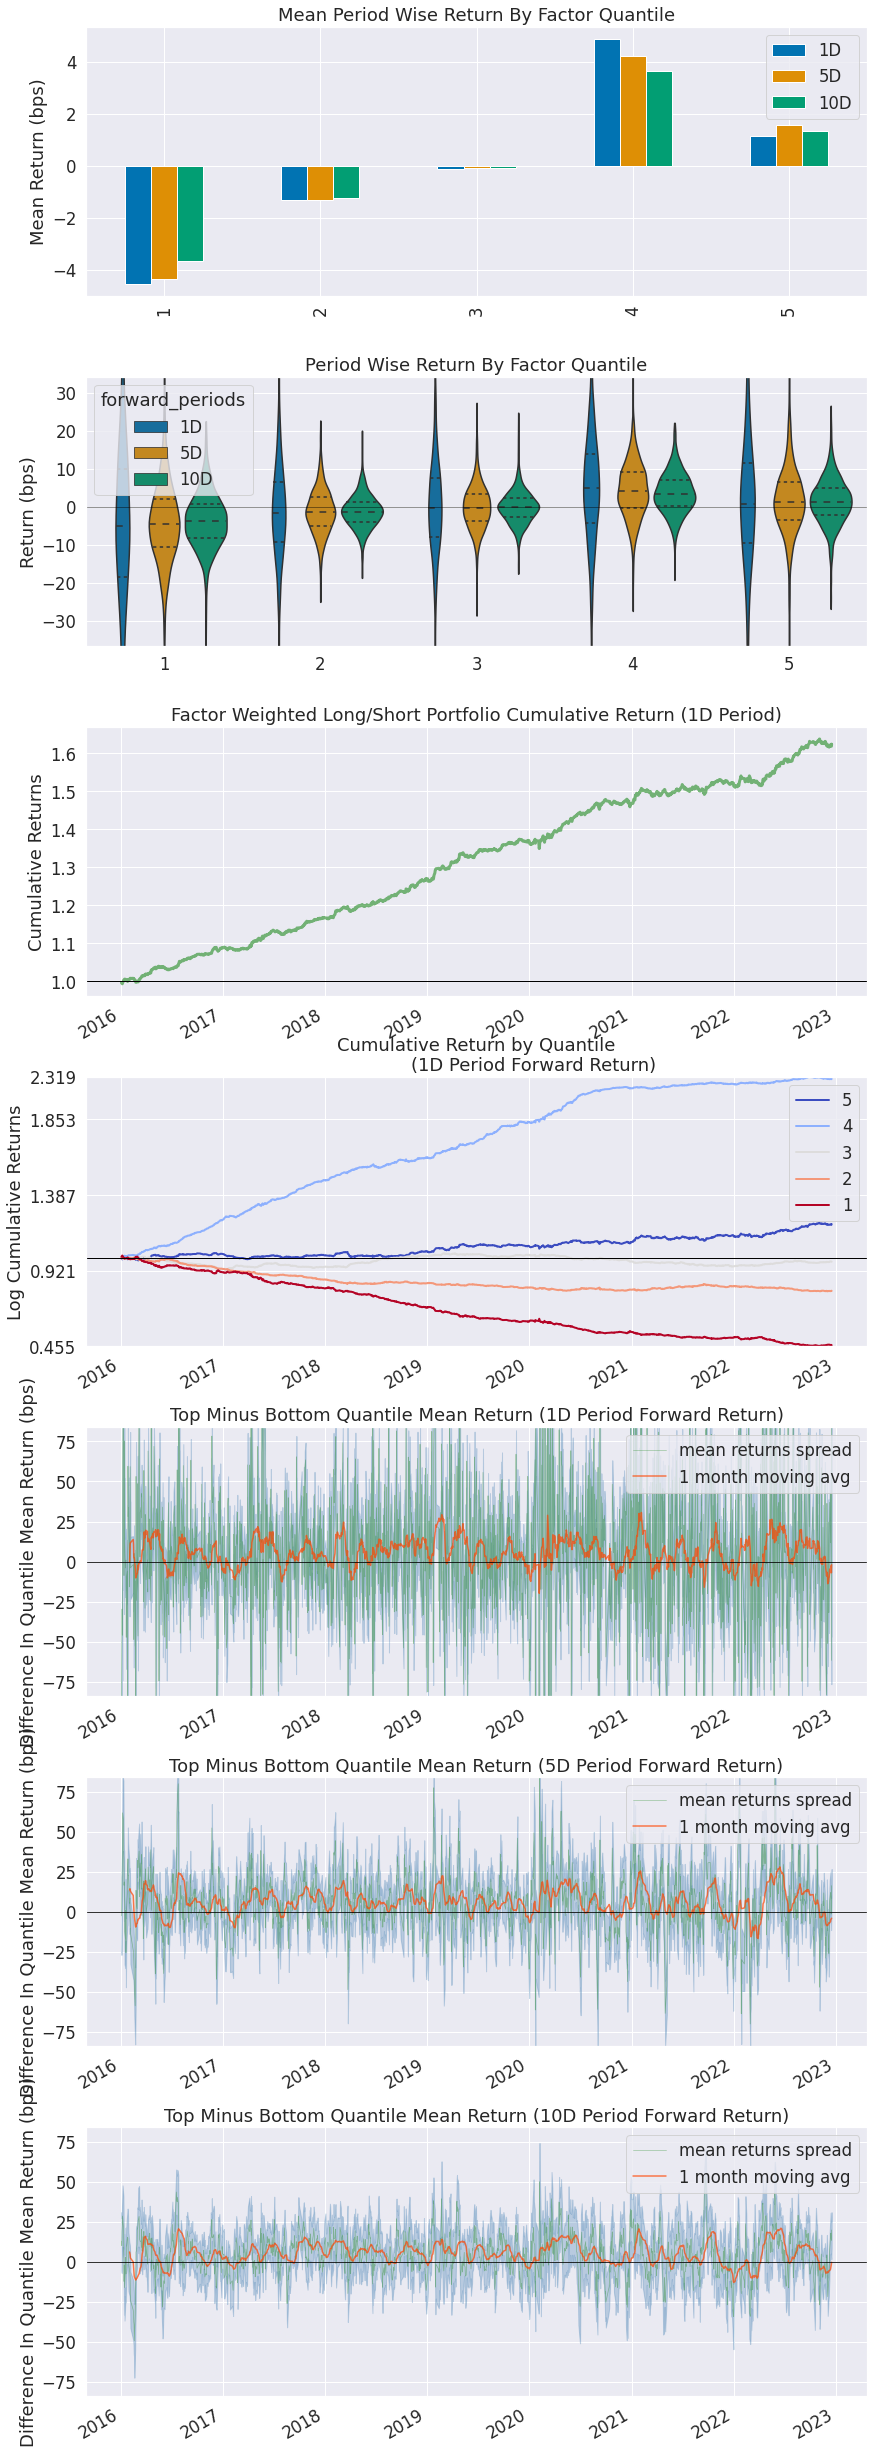

Information Analysis


,1D,5D,10D
IC Mean,0.015,0.032,0.038
IC Std.,0.057,0.058,0.056
Risk-Adjusted IC,0.259,0.548,0.681
t-stat(IC),10.675,22.540,28.033
p-value(IC),0.000,0.000,0.000
IC Skew,-0.054,0.000,-0.079
IC Kurtosis,0.433,0.424,0.227


/home/chencheng/pytorch/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/chencheng/pytorch/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/chencheng/pytorch/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility)

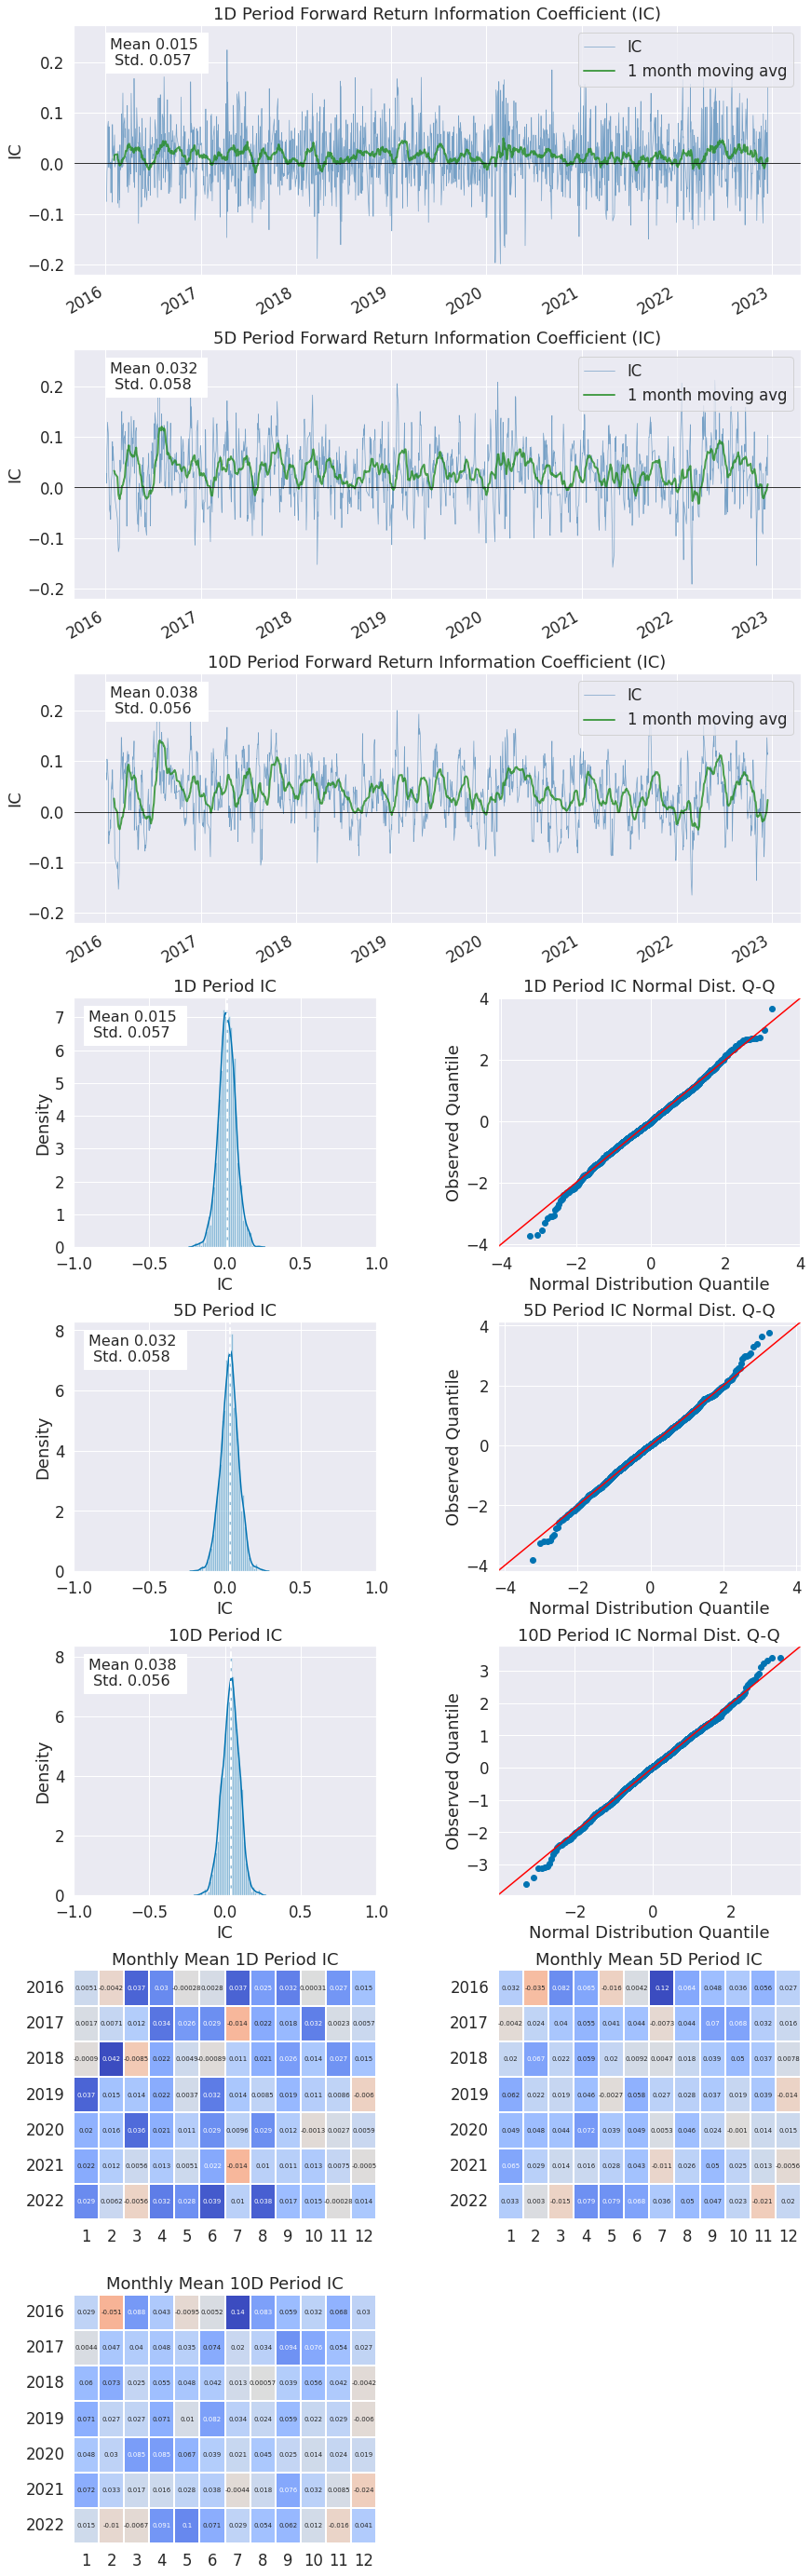

/home/chencheng/pytorch/lib/python3.7/site-packages/alphalens/utils.py:911: UserWarning: Skipping return periods that aren't exact multiples of days.
  "Skipping return periods that aren't exact multiples"


Turnover Analysis


,1D,5D,10D
Quantile 1 Mean Turnover,0.253,0.658,0.752
Quantile 2 Mean Turnover,0.489,0.769,0.793
Quantile 3 Mean Turnover,0.538,0.781,0.798
Quantile 4 Mean Turnover,0.501,0.765,0.791
Quantile 5 Mean Turnover,0.274,0.669,0.765


,1D,5D,10D
Mean Factor Rank Autocorrelation,0.853,0.284,0.095


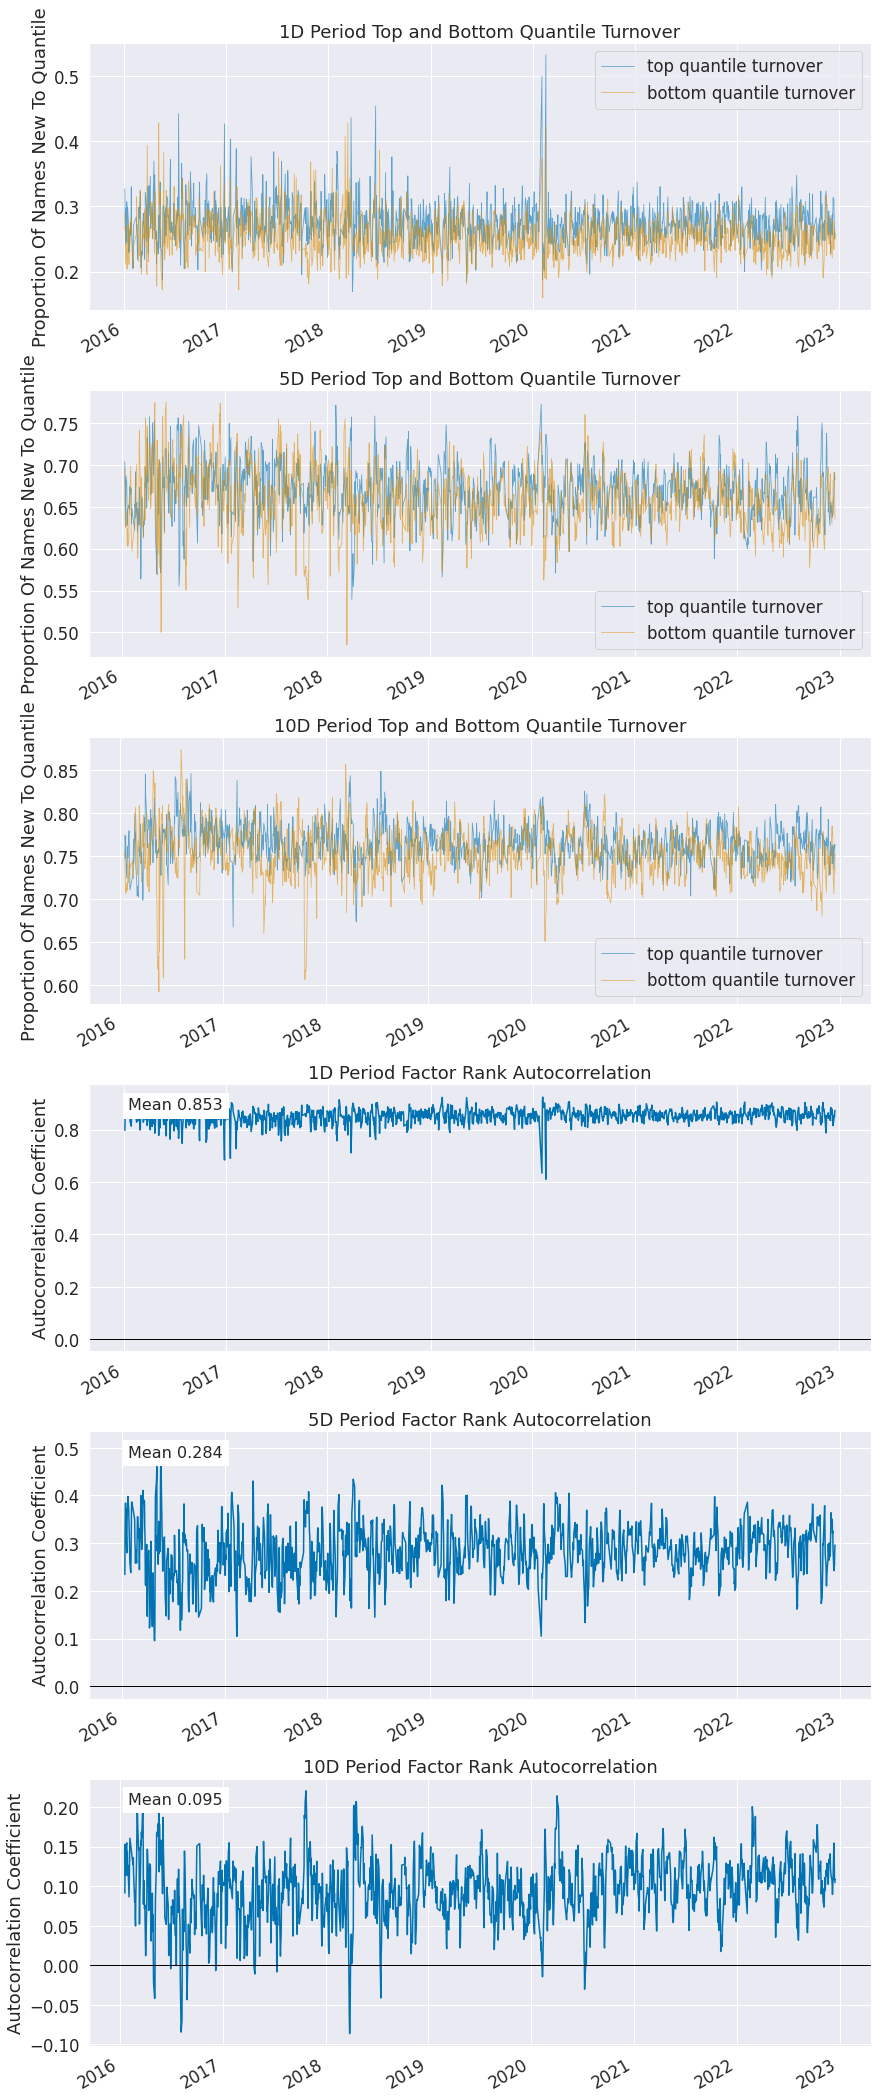

In [5]:
alphas_101.tst_alphas(alpha_names=alpha_list)

### model_training

    Recurrent Model:
        - LSTM
        - GRU
        - Transformer

    Graph Model:
        - LSTM_GCN
        - TGC
        - HATS
        - THGNN

AAAI_tutorial_GNN.pdf; 

B站李沐

In [31]:
opn = pd.read_hdf(os.path.join(DATA_PATH, "Ashare_data/1day_data/pv_ffill.h5"), key="open")
opn_r = opn.pct_change()
opn_r = opn_r.shift(-2)

In [32]:
factor_list = ['alphas_101_alpha_035',
               'alphas_101_alpha_038',
               'alphas_101_alpha_040',
               'alphas_101_alpha_043',
               'alphas_101_alpha_045',
               'alphas_101_alpha_049',
               'alphas_101_alpha_051',
               'alphas_101_alpha_053',
               'alphas_101_alpha_055',
               'alphas_101_alpha_060',
               'alphas_101_alpha_085',
               'alphas_101_alpha_001',
               'alphas_101_alpha_002',
               'alphas_101_alpha_003',
               'alphas_101_alpha_004',
               'alphas_101_alpha_006',
               'alphas_101_alpha_007',
               'alphas_101_alpha_008',
               'alphas_101_alpha_009',
               'alphas_101_alpha_010',
               'alphas_101_alpha_012',
               'alphas_101_alpha_013',
               'alphas_101_alpha_014',
               'alphas_101_alpha_015',
               'alphas_101_alpha_016',
               'alphas_101_alpha_017',
               'alphas_101_alpha_018',
               'alphas_101_alpha_019',
               'alphas_101_alpha_020',
               'alphas_101_alpha_021',
               'alphas_101_alpha_022',
               'alphas_101_alpha_023',
               'alphas_101_alpha_024',
               'alphas_101_alpha_026',
               'alphas_101_alpha_028',
               'alphas_101_alpha_029',
               'alphas_101_alpha_030',
               'alphas_101_alpha_031',
               'alphas_101_alpha_033',
               'alphas_101_alpha_034',
               'alphas_101_alpha_037',
               'alphas_101_alpha_039',
               'alphas_101_alpha_044',
               'alphas_101_alpha_046',
               'alphas_101_alpha_052',
               'alphas_101_alpha_054',
               'alphas_101_alpha_068']

In [33]:
s_800 = gru_scheduler(name="gru_demo",
                      train_len=252*5,
                      valid_len=252,
                      look_back_window=2,
                      factor_list=factor_list,
                      universe_version="zz800",
                      label_df=opn_r,
                      batch_size=1,
                      hidden_size=64,
                      num_layers=1,
                      lr=0.001,
                      weight_decay=0.0001,
                      epochs=50,
                      max_patience=5)
s_800.train("20210101", "20221231")

/home/chencheng/pytorch/lib/python3.7/site-packages/torch/nn/modules/rnn.py:65: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.1 and num_layers=1
  "num_layers={}".format(dropout, num_layers))
100%|██████████| 1007/1007 [00:09<00:00, 111.38it/s]
2023-05-28 20:55:17,643 /home/chencheng/gru_demo/task.log INFO EPOCH 0: LOSS 0.999713 | METRIC 0.027
100%|██████████| 251/251 [00:01<00:00, 134.81it/s]
2023-05-28 20:55:20,039 /home/chencheng/gru_demo/task.log INFO EPOCH 0: LOSS 0.999910 | METRIC 0.018
2023-05-28 20:55:20,040 /home/chencheng/gru_demo/task.log INFO EPOCH 0: BEST METRIC 0.018
100%|██████████| 1007/1007 [00:08<00:00, 120.31it/s]
2023-05-28 20:55:30,497 /home/chencheng/gru_demo/task.log INFO EPOCH 1: LOSS 0.997483 | METRIC 0.039
100%|██████████| 251/251 [00:01<00:00, 153.24it/s]
2023-05-28 20:55:32,669 /home/chencheng/gru_demo/task.log INFO EPOCH 1: LOSS 0.999747 | METRIC 0.022
20

### model_evaluate

In [37]:
loss_800, ic_800, df_800 = s_800.predict("20210101", "20221231")

100%|██████████| 485/485 [00:03<00:00, 144.25it/s]


In [36]:
create_full_tear_sheet(df_800.set_index(["date", "stock_id"]))

{'IC': 0.025828703845715013,
 'Rank IC': 0.02681701241915509,
 'ARR': 0.20537285038306033,
 'AV': 0.04714077571692819,
 'Sharpe': 4.35658614563933,
 'WR': 0.6418219461697723,
 'MDD': -0.020325660588257355}